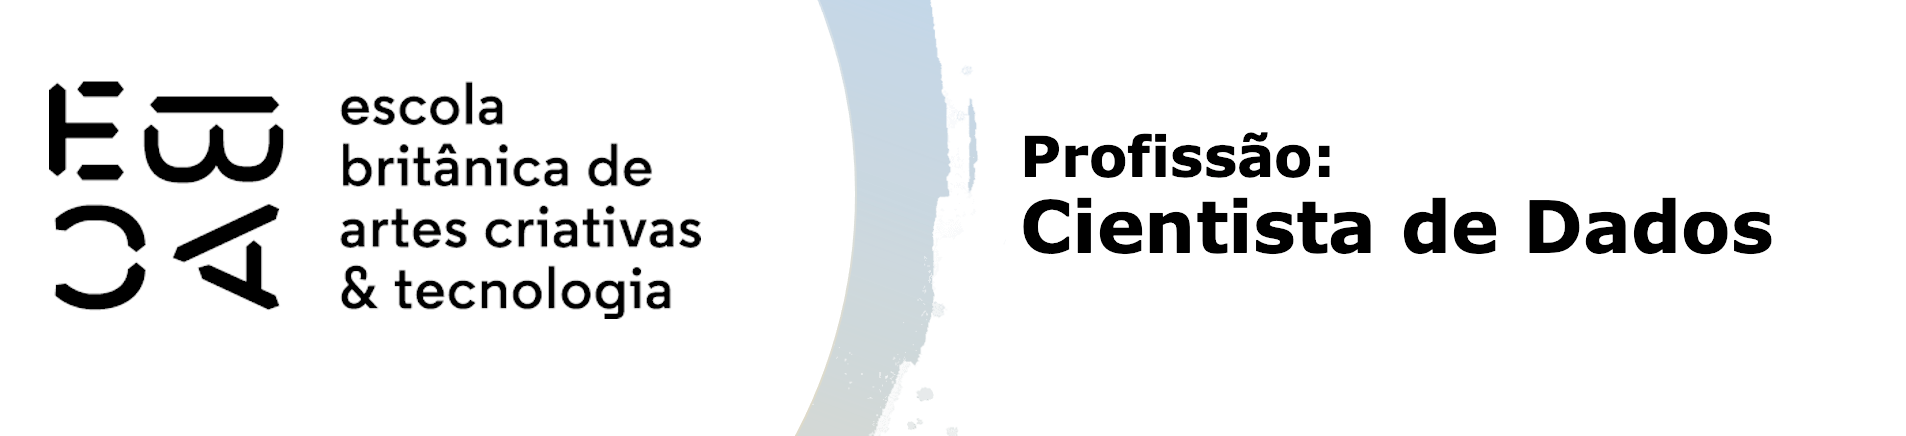

# Métodos hierárquicos de agrupamento - Tarefa

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [3]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [4]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [7]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [17]:
df = peng.select_dtypes('number').dropna()
df_pad = StandardScaler().fit_transform(df)

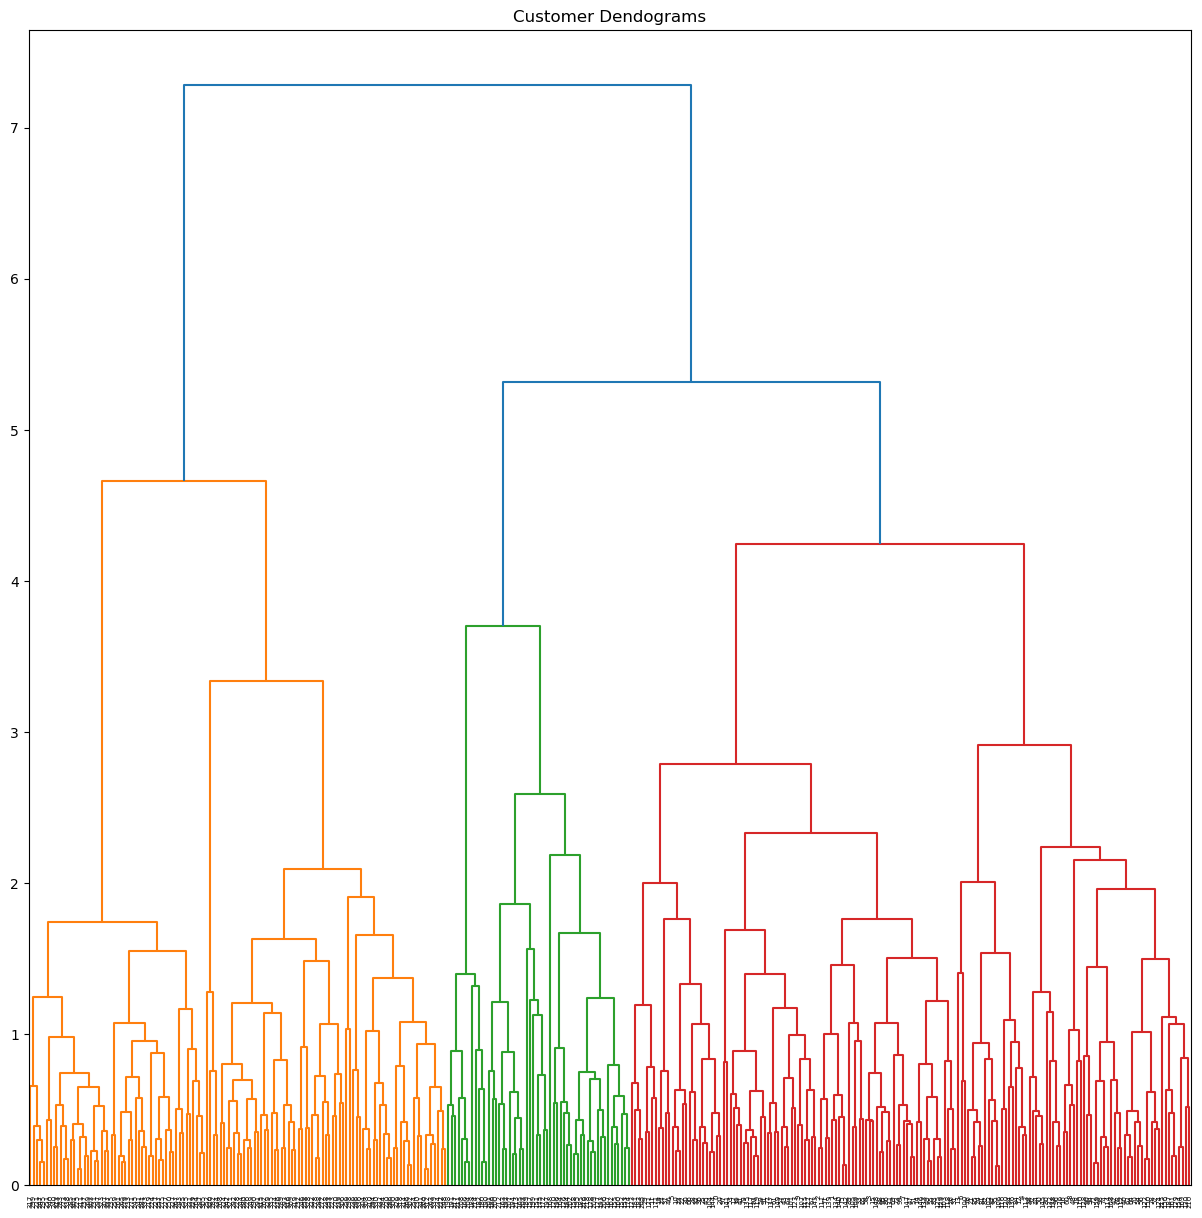

In [18]:
plt.figure(figsize=(15, 15))

plt.title("Customer Dendograms")

dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))

In [19]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
peng_num['cluster'] = cluster.fit_predict(peng_pad)


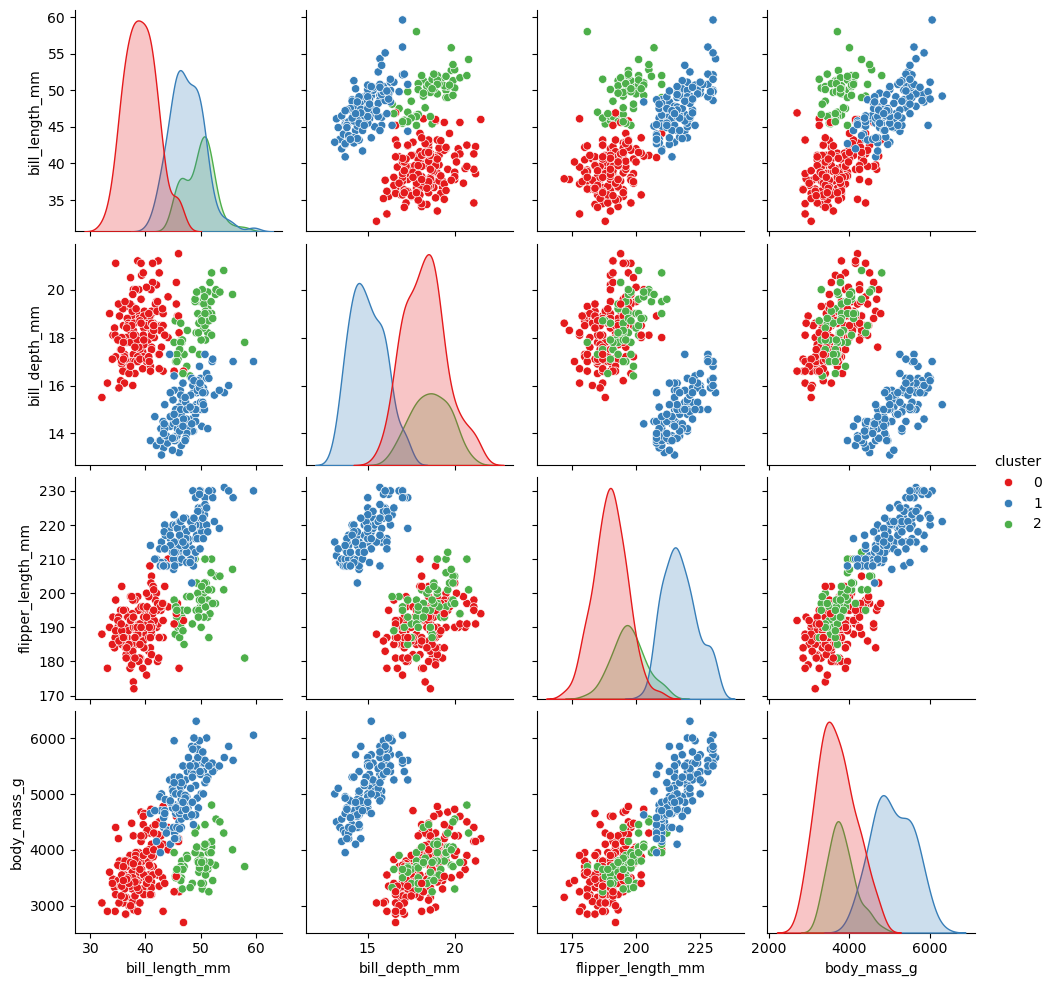

In [21]:
sns.pairplot(peng_num, hue='cluster', palette='Set1')
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [23]:
peng_clean = peng.loc[peng_num.index]  

peng_clean['cluster'] = peng_num['cluster']

contagem_especies = pd.crosstab(peng_clean['cluster'], peng_clean['species'])
print(contagem_especies)


species  Adelie  Chinstrap  Gentoo
cluster                           
0           151         11       0
1             0          0     123
2             0         57       0


In [24]:
estatisticas = peng_num.groupby('cluster').agg(['mean', 'std'])
print(estatisticas)


        bill_length_mm           bill_depth_mm           flipper_length_mm  \
                  mean       std          mean       std              mean   
cluster                                                                      
0            39.150000  2.936560     18.287654  1.221127        189.901235   
1            47.504878  3.081857     14.982114  0.981220        217.186992   
2            49.752632  2.710107     18.601754  1.072629        197.105263   

                   body_mass_g              
              std         mean         std  
cluster                                     
0        6.529636  3675.771605  461.704434  
1        6.484976  5076.016260  504.116237  
2        6.526551  3810.087719  338.255096  


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [27]:
# Novo agrupamento com 4 clusters
cluster_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
peng_num['cluster_4'] = cluster_4.fit_predict(peng_pad)

In [28]:
# Adiciona ao DataFrame original
peng_clean['cluster_4'] = peng_num['cluster_4']

In [29]:
# Contagem de espécies por cluster
pd.crosstab(peng_clean['cluster_4'], peng_clean['species'])

species,Adelie,Chinstrap,Gentoo
cluster_4,,,
0,0,0,123
1,97,8,0
2,0,57,0
3,54,3,0


In [30]:
# Contagem de espécie x sexo por cluster
pd.crosstab([peng_clean['cluster_4'], peng_clean['species']], peng_clean['sex'])

sex                  Female  Male
cluster_4 species                
0         Gentoo         58    61
1         Adelie         72    21
          Chinstrap       8     0
2         Chinstrap      23    34
3         Adelie          1    52
          Chinstrap       3     0

In [31]:
# Estatísticas descritivas por grupo
peng_num.groupby('cluster_4').agg(['mean', 'std'])

bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
cluster_4                                                                      
0              47.504878  3.081857     14.982114  0.981220        217.186992   
1              38.054286  2.639020     17.731429  0.926461        187.114286   
2              49.752632  2.710107     18.601754  1.072629        197.105263   
3              41.168421  2.336753     19.312281  1.021915        195.035088   

                     body_mass_g             cluster       
                std         mean         std    mean  std  
cluster_4                                                  
0          6.484976  5076.016260  504.116237     1.0  0.0  
1          5.447855  3427.380952  304.187992     0.0  0.0  
2          6.526551  3810.087719  338.255096     2.0  0.0  
3          5.105896  4133.333333  335.021765     0.0  0.0

Nota-se uma clara divisão de tamanho dos Adelies, que foram separados em dois grupos, identificando uma subespécie menor ou uma distinção clara entre machos e femeas que é aparentemente confirmada pela separação entre sexo.